<a href="https://colab.research.google.com/github/Garry14/generate-feature-folder/blob/main/Belajar_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing necessary libs
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Reading CSV dan Columns
order_df = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/order.csv")
print(order_df.columns)

Index(['order_id', 'quantity', 'product_id', 'price', 'seller_id',
       'freight_value', 'customer_id', 'order_status', 'purchase_date',
       'payment_type', 'product_category_name', 'product_weight_gram'],
      dtype='object')


In [ ]:
# Quick summary  dari segi kuantitas, harga, freight value, dan weight
print(order_df.describe())

In [ ]:
# Median dari total pembelian konsumen per transaksi kolom price
print(order_df.loc[:, "price"].median())

2610000.0


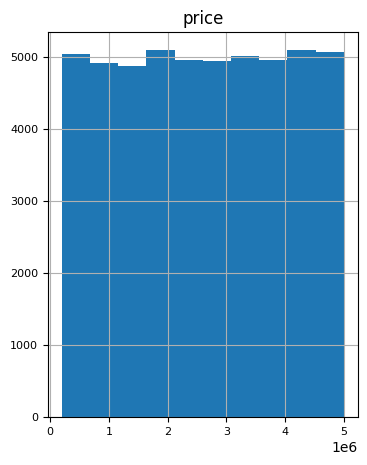

In [ ]:
# Histogram Harga
order_df[["price"]].hist(figsize=(4,5), bins=10, xlabelsize=8, ylabelsize=8)
plt.show()

In [ ]:
# Standar Deviasi dan Variant
product_weight_gram_data = order_df.loc[:,'product_weight_gram']
print(f"Standar Deviasi : {product_weight_gram_data.std()}")
print(f"Variant : {product_weight_gram_data.var()}")

Standar Deviasi : 3929.896875372737
Variant : 15444089.451064402


Sekarang ceritanya mau mendeteksi Outliers, yaitu data yang aneh sendiri, nilainya jauh sendiri di luar minimum dari quantile 1 dan di luar maksimum dari quantile 3. Abnormal.

In [ ]:
# Quantiles
# Product Weight Gram column in Order Data Frame
def score_quantile(value):
  return order_df[['product_weight_gram']].quantile(value)

pwg_q1 = score_quantile(0.25)
pwg_q3 = score_quantile(0.75)
pwg_iqr = pwg_q3 - pwg_q1
print(f"Q1 : {pwg_q1}\nQ3 : {pwg_q3}\nIQR : {pwg_iqr}")

pwg_lower_bound = pwg_q1 - (1.5 * pwg_iqr)
pwg_upper_bound = pwg_q3 + (1.5 * pwg_iqr)
outliers = order_df[(order_df[['product_weight_gram']] < pwg_lower_bound) | (order_df[['product_weight_gram']] > pwg_upper_bound)]
print(f"Outliers : {outliers}")

Q1 : product_weight_gram    300.0
Name: 0.25, dtype: float64
Q3 : product_weight_gram    1850.0
Name: 0.75, dtype: float64
IQR : product_weight_gram    1550.0
dtype: float64
Outliers :       order_id  quantity product_id  price seller_id  freight_value  \
0          NaN       NaN        NaN    NaN       NaN            NaN   
1          NaN       NaN        NaN    NaN       NaN            NaN   
2          NaN       NaN        NaN    NaN       NaN            NaN   
3          NaN       NaN        NaN    NaN       NaN            NaN   
4          NaN       NaN        NaN    NaN       NaN            NaN   
...        ...       ...        ...    ...       ...            ...   
49994      NaN       NaN        NaN    NaN       NaN            NaN   
49995      NaN       NaN        NaN    NaN       NaN            NaN   
49996      NaN       NaN        NaN    NaN       NaN            NaN   
49997      NaN       NaN        NaN    NaN       NaN            NaN   
49998      NaN       NaN        Na

In [ ]:
# Group By
price_mean = order_df["price"].groupby(order_df["payment_type"]).mean()
print(price_mean)


payment_type
credit card        2.600706e+06
debit card         2.611974e+06
e-wallet           2.598562e+06
virtual account    2.619786e+06
Name: price, dtype: float64


In [ ]:
# Sort
# df.sort_values(by="column_sort", ascending=False)
order_harga = order_df.sort_values(by="price", ascending=False)
print(order_harga)

                               order_id  quantity  \
22618  a767765cf25c6fcfd8307499da9205d2         1   
41958  2711089c7fec59d4dc8483e3c6a12fa3         1   
47074  f6134169ca6f0cdfbe6458ebb5731613         1   
21072  c8947a583ab9791a5a9d02384cb84302         1   
37085  d7b2d3b902441cf3dd12cd125533217d         1   
...                                 ...       ...   
42166  54220fcc516cabe9ec84b210c0765ef2         1   
42452  9960ee97c2f8d801a200a01893b3942f         1   
31745  59a19c83ff825948739dd1601cc107b6         1   
42025  36cdcd48e9697951eef9c32ef39dc9f3         1   
33786  0d9e86e02c1a823b20c03ea29d616607         1   

                             product_id    price  \
22618  48698ba0cfe847b41430fa00081b5619  5000000   
41958  7c1bd920dbdf22470b68bde975dd3ccf  5000000   
47074  2ea92fab7565c4fe9f91a5e4e1756258  5000000   
21072  f8cfb63e323be2e1c4172f255d61843d  5000000   
37085  35afc973633aaeb6b877ff57b2793310  5000000   
...                                 ...      ...   

In [ ]:
# Rename Column
# order_df.rename(columns={"freight_value": "shopping_cost"}, inplace=True)